<h1 style="property:value;color:LightSeaGreen;font-size:300%;text-align:center; ">Kariman Karm Mohamed Mousaa </h1>

<h6 style="property:value;color:LightSlateGray;font-size:200%; "> CSAI 801 Project: COVID-19 Outcome Prediction</h6>

<h6 style="property:value;color:LightCoral;font-size:150%;background-color:Azure; ">Project Description</h6>
<p style="property:value;color:MidnightBlue;font-size:100%;">
The data used in this project will help to identify whether a person is going to recover from<br>
coronavirus symptoms or not based on some pre-defined standard symptoms. These symptoms are<br>
based on guidelines given by the World Health Organization (WHO).<br>
This dataset has daily level information on the number of affected cases, deaths and recovery from<br>
2019 novel coronavirus. Please note that this is a time series data and so the number of cases on<br>
any given day is the cumulative number.<br>
The data is available from 22 Jan, 2020. Data is in “data.csv”.<br>
The dataset contains 14 major variables that will be having an impact on whether someone has<br>
recovered or not, the description of each variable are as follows,<br>
</p>
<pre style="property:value;color:MidnightBlue;font-size:100%;">
1. Country: where the person resides
2. Location: which part in the Country
3. Age: Classification of the age group for each person, based on WHO Age Group Standard
4. Gender: Male or Female
5. Visited_Wuhan: whether the person has visited Wuhan, China or not
6. From_Wuhan: whether the person is from Wuhan, China or not
7. Symptoms: there are six families of symptoms that are coded in six fields.
13. Time_before_symptoms_appear:
14. Result: death (1) or recovered (0)
</pre>

<h6 style="property:value;color:blue;font-size:200%; ">1- part1</h6>
<h6 style="property:value;color:Tan;font-size:150%; ">a- Import Libraries and Load the Data</h6>

In [1]:
#import basic libraries 
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn import metrics
from sklearn.metrics import roc_auc_score
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn import preprocessing
#from sklearn.feature_selection import SelectKBest, chi2
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')

In [2]:
#load data 
data=pd.read_csv('data.csv',index_col=0)
data.head(9)

,location,country,gender,age,vis_wuhan,from_wuhan,symptom1,symptom2,symptom3,symptom4,symptom5,symptom6,diff_sym_hos,result
0,104,8,1,66.0,1,0,14,31,19,12,3,1,8,1
1,101,8,0,56.0,0,1,14,31,19,12,3,1,0,0
2,137,8,1,46.0,0,1,14,31,19,12,3,1,13,0
3,116,8,0,60.0,1,0,14,31,19,12,3,1,0,0
4,116,8,1,58.0,0,0,14,31,19,12,3,1,0,0
5,23,8,0,44.0,0,1,14,31,19,12,3,1,0,0
6,105,8,1,34.0,0,1,14,31,19,12,3,1,0,0
7,13,8,1,37.0,1,0,14,31,19,12,3,1,6,0
8,13,8,1,39.0,1,0,14,31,19,12,3,1,5,0


<h6 style="property:value;color:Tan;font-size:200%; ">b- Exploratory Data Analysis (EDA)</h6>

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 863 entries, 0 to 862
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   location      863 non-null    int64  
 1   country       863 non-null    int64  
 2   gender        863 non-null    int64  
 3   age           863 non-null    float64
 4   vis_wuhan     863 non-null    int64  
 5   from_wuhan    863 non-null    int64  
 6   symptom1      863 non-null    int64  
 7   symptom2      863 non-null    int64  
 8   symptom3      863 non-null    int64  
 9   symptom4      863 non-null    int64  
 10  symptom5      863 non-null    int64  
 11  symptom6      863 non-null    int64  
 12  diff_sym_hos  863 non-null    int64  
 13  result        863 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 101.1 KB


In [ ]:
data.describe()

,location,country,gender,age,vis_wuhan,from_wuhan,symptom1,symptom2,symptom3,symptom4,symptom5,symptom6,diff_sym_hos,result
count,863.000000,863.000000,863.000000,863.000000,863.000000,863.000000,863.00000,863.000000,863.000000,863.000000,863.000000,863.000000,863.000000,863.000000
mean,76.645423,16.995365,0.849363,49.400000,0.181924,0.107764,12.13905,28.002317,18.298957,11.840093,2.993048,0.998841,0.995365,0.125145
std,39.200264,7.809951,0.726062,15.079203,0.386005,0.310261,3.99787,7.473231,2.864064,1.183771,0.127251,0.034040,2.358767,0.331075
min,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,-5.000000,0.000000
25%,45.000000,11.000000,0.000000,40.000000,0.000000,0.000000,14.00000,31.000000,19.000000,12.000000,3.000000,1.000000,0.000000,0.000000
50%,87.000000,18.000000,1.000000,49.400000,0.000000,0.000000,14.00000,31.000000,19.000000,12.000000,3.000000,1.000000,0.000000,0.000000
75%,110.000000,24.000000,1.000000,57.000000,0.000000,0.000000,14.00000,31.000000,19.000000,12.000000,3.000000,1.000000,1.000000,0.000000
max,138.000000,33.000000,2.000000,96.000000,1.000000,1.000000,24.00000,31.000000,19.000000,12.000000,3.000000,1.000000,15.000000,1.000000


In [ ]:
#find the outlier
data[data.diff_sym_hos < 0]

,location,country,gender,age,vis_wuhan,from_wuhan,symptom1,symptom2,symptom3,symptom4,symptom5,symptom6,diff_sym_hos,result
223,56,18,1,35.0,0,0,6,31,19,12,3,1,-1,0
240,128,18,1,65.0,0,0,6,31,19,12,3,1,-5,0


In [5]:
#remove the outlier
data.drop([223,240],axis = 0, inplace=True)

In [ ]:
data.describe()

,location,country,gender,age,vis_wuhan,from_wuhan,symptom1,symptom2,symptom3,symptom4,symptom5,symptom6,diff_sym_hos,result
count,861.000000,861.000000,861.000000,861.000000,861.000000,861.000000,861.000000,861.000000,861.000000,861.000000,861.000000,861.000000,861.000000,861.000000
mean,76.609756,16.993031,0.849013,49.398606,0.182346,0.108014,12.153310,27.995354,18.297329,11.839721,2.993031,0.998839,1.004646,0.125436
std,39.200393,7.818877,0.726869,15.079359,0.386354,0.310578,3.991526,7.480516,2.867193,1.185122,0.127399,0.034080,2.351640,0.331405
min,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,45.000000,11.000000,0.000000,40.000000,0.000000,0.000000,14.000000,31.000000,19.000000,12.000000,3.000000,1.000000,0.000000,0.000000
50%,87.000000,18.000000,1.000000,49.400000,0.000000,0.000000,14.000000,31.000000,19.000000,12.000000,3.000000,1.000000,0.000000,0.000000
75%,110.000000,24.000000,1.000000,57.000000,0.000000,0.000000,14.000000,31.000000,19.000000,12.000000,3.000000,1.000000,1.000000,0.000000
max,138.000000,33.000000,2.000000,96.000000,1.000000,1.000000,24.000000,31.000000,19.000000,12.000000,3.000000,1.000000,15.000000,1.000000


In [ ]:
np.unique(data['symptom2'])

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31])

In [ ]:
data.result.value_counts()

0    753
1    108
Name: result, dtype: int64

<AxesSubplot:title={'center':'Gender percentage'}>

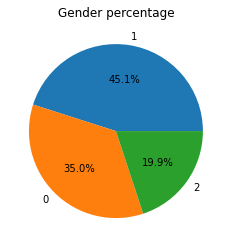

In [3]:
lab = data['gender'].value_counts()
lab.plot.pie(title ='Gender percentage', ylabel='', autopct='%1.1f%%')

In [4]:
#dropping gender there are problem with it 
df = data.copy()
df.drop("gender",axis = 1, inplace=True)
df

,location,country,age,vis_wuhan,from_wuhan,symptom1,symptom2,symptom3,symptom4,symptom5,symptom6,diff_sym_hos,result
0,104,8,66.0,1,0,14,31,19,12,3,1,8,1
1,101,8,56.0,0,1,14,31,19,12,3,1,0,0
2,137,8,46.0,0,1,14,31,19,12,3,1,13,0
3,116,8,60.0,1,0,14,31,19,12,3,1,0,0
4,116,8,58.0,0,0,14,31,19,12,3,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
858,48,3,24.0,0,0,14,31,19,12,3,1,0,1
859,0,0,35.0,0,0,14,31,19,12,3,1,0,0
860,3,1,49.4,0,0,14,31,19,12,3,1,0,0
861,24,9,49.4,0,0,14,31,19,12,3,1,0,0


In [5]:
#hot encoding and merging "location and "country" 
categorical_columns = ['location','country']
for column in categorical_columns:
    temp = pd.get_dummies(df[column], prefix=column)
    df = pd.merge(
        left=df,
        right=temp,
        left_index=True,
        right_index=True,
    )
    df = df.drop(columns=column)

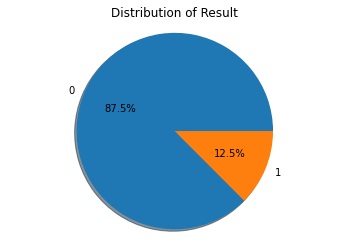

In [6]:
labels=df['result'].astype('category').cat.categories.tolist()
counts=df.result.value_counts()
sizes = [counts[var_cat] for var_cat in labels]
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True)
ax1.axis('equal')
plt.title('Distribution of Result')
plt.show()

<AxesSubplot:xlabel='result', ylabel='count'>

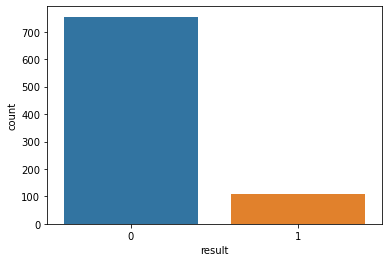

In [7]:
sns.countplot(df.result)

<AxesSubplot:>

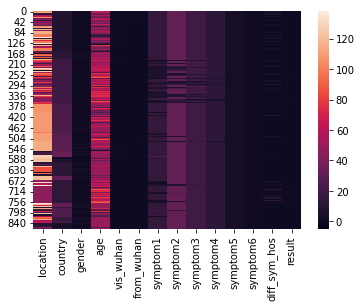

In [13]:
sns.heatmap(data)

<h6 style="property:value;color:blue;font-size:200%; ">2- part2 without solve the imbalance problem</h6>
<pre>You will have to divide the data into three partitions: training, validation, and testing. You need to
design the following classifiers:
1. K-Nearest Neighbors
2. Logistic Regression
3. Naïve Bayes
4. Decision Trees
5. Support Vector Machines
For each classifier, try to find the optimal hyperparameters.
You also need to compare the performance of all classifiers using different metrics such as the
precision, recall, F1-score, and ROC/AUC curves.
</pre>

<h6 style="property:value;color:Tan;font-size:200%; ">a- Splitting data</h6>


In [8]:
x=df.drop('result',axis=1)
y=df['result']

In [9]:
#Normalizing and selecting data
t = preprocessing.normalize(x)
names = x.columns.values.tolist()
x = pd.DataFrame(t, columns = names)
x = StandardScaler().fit_transform(x)
x

array([[ 0.6544187 ,  1.46107129, -0.34092851, ..., -0.12856487,
        -0.13265001, -0.09683237],
       [ 0.36274435, -0.46513845,  2.41065112, ..., -0.12856487,
        -0.13265001, -0.09683237],
       [-0.22313197, -0.46513845,  2.69193014, ..., -0.12856487,
        -0.13265001, -0.09683237],
       ...,
       [ 0.07727726, -0.46513845, -0.34092851, ..., -0.12856487,
        -0.13265001, -0.09683237],
       [ 0.07727726, -0.46513845, -0.34092851, ..., -0.12856487,
        -0.13265001, -0.09683237],
       [ 0.79212957, -0.46513845, -0.34092851, ..., -0.12856487,
        -0.13265001, -0.09683237]])

In [10]:
x.shape

(861, 183)

In [11]:
#Splitting data to train ,validation and Test (80,10,10)
X_train, X_both, y_train, y_both = train_test_split(x, y, test_size = 0.2, random_state=3)
X_test, X_valid, y_test, y_valid = train_test_split(X_both, y_both, test_size = 0.5, random_state=3)

<h6 style="property:value;color:Tan;font-size:200%; ">b- Models</h6>

# 1. K-Nearest Neighbors 

In [ ]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_valid)
print(classification_report(y_valid, y_pred))
print(f"confusion_matrix:{confusion_matrix(y_valid, y_pred)}")
print(f"f1_score={f1_score(y_valid, y_pred, average='binary')}")

              precision    recall  f1-score   support

           0       0.99      0.95      0.97        81
           1       0.56      0.83      0.67         6

    accuracy                           0.94        87
   macro avg       0.77      0.89      0.82        87
weighted avg       0.96      0.94      0.95        87

confusion_matrix:[[77  4]
 [ 1  5]]
f1_score=0.6666666666666667


In [ ]:
#find the optimal hyperparameters knn
l = []
# Loop over K values
for i, k in enumerate(np.arange(1, 10)):
    knn = KNeighborsClassifier(n_neighbors=k)
    y_pred = cross_val_score(knn, X_train, y_train, cv=20).mean()
    l.append(y_pred)
    if y_pred >= max(l):
        maxn = k
    
print(f"The optimal k is {maxn} with value {max(l)}")  

The optimal k is 1 with value 0.9228571428571428


In [ ]:
#Validation with the optimal k
knn = KNeighborsClassifier(n_neighbors=1, algorithm = 'brute')
knn.fit(X_train, y_train)
y_pred = knn.predict(X_valid)
print(classification_report(y_valid, y_pred))
print(f"confusion_matrix:{confusion_matrix(y_valid, y_pred)}")
print(f"f1_score={f1_score(y_valid, y_pred, average='binary')}")

              precision    recall  f1-score   support

           0       0.99      0.99      0.99        81
           1       0.83      0.83      0.83         6

    accuracy                           0.98        87
   macro avg       0.91      0.91      0.91        87
weighted avg       0.98      0.98      0.98        87

confusion_matrix:[[80  1]
 [ 1  5]]
f1_score=0.8333333333333334


# 2. Logistic Regression

In [ ]:
lr = LogisticRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_valid)
print(classification_report(y_valid, y_pred))
print(f"confusion_matrix:{confusion_matrix(y_valid, y_pred)}")
print(f"f1_score={f1_score(y_valid, y_pred, average='binary')}")

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        81
           1       1.00      1.00      1.00         6

    accuracy                           1.00        87
   macro avg       1.00      1.00      1.00        87
weighted avg       1.00      1.00      1.00        87

confusion_matrix:[[81  0]
 [ 0  6]]
f1_score=1.0


In [ ]:
#find the optimal hyperparameters
LR = LogisticRegression()
LRparam_grid = {
    'C': [0.01, 0.1, 1, 10, 100, 1000],
    'penalty': ['none','l1', 'l2'],
    'solver': ['lbfgs', 'liblinear']
}
LR_search = GridSearchCV(LR, param_grid = LRparam_grid, refit = True, verbose = 1, cv=17)

# fitting the model for grid search 
LR_search.fit(X_train , y_train)

all_param = []
all_param= list(LR_search.best_params_.values())

lr = LogisticRegression(C= all_param[0] , penalty= all_param[1], solver= all_param[2])
lr.fit(X_train, y_train)
y_pred = lr.predict(X_valid)

Fitting 17 folds for each of 36 candidates, totalling 612 fits


In [ ]:
print(classification_report(y_valid, y_pred))
print(f"confusion_matrix:{confusion_matrix(y_valid, y_pred)}")
print(f"f1_score={f1_score(y_valid, y_pred, average='binary')}")

              precision    recall  f1-score   support

           0       1.00      0.96      0.98        81
           1       0.67      1.00      0.80         6

    accuracy                           0.97        87
   macro avg       0.83      0.98      0.89        87
weighted avg       0.98      0.97      0.97        87

confusion_matrix:[[78  3]
 [ 0  6]]
f1_score=0.8


# 3. Naïve Bayes

In [ ]:
gb = GaussianNB()
gb.fit(X_train, y_train)
y_pred = gb.predict(X_valid)
print(classification_report(y_valid, y_pred))
print(f"confusion_matrix:{confusion_matrix(y_valid, y_pred)}")
print(f"f1_score={f1_score(y_valid, y_pred, average='binary')}")

              precision    recall  f1-score   support

           0       1.00      0.49      0.66        81
           1       0.13      1.00      0.23         6

    accuracy                           0.53        87
   macro avg       0.56      0.75      0.44        87
weighted avg       0.94      0.53      0.63        87

confusion_matrix:[[40 41]
 [ 0  6]]
f1_score=0.22641509433962262


In [ ]:
#find the optimal hyperparameters
g=GaussianNB()
params_NB = {'var_smoothing': np.logspace(0,-9, num=100)}
gs_NB = GridSearchCV(estimator=g, param_grid = params_NB, verbose=1, scoring='accuracy') 
gs_NB.fit(X_train, y_train)

var_value = gs_NB.best_params_.get('var_smoothing')
gb = GaussianNB(var_smoothing = var_value)
gb.fit(X_train, y_train)
y_pred = gb.predict(X_valid)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


In [ ]:
print(classification_report(y_valid, y_pred))
print(f"confusion_matrix:{confusion_matrix(y_valid, y_pred)}")
print(f"f1_score={f1_score(y_valid, y_pred, average='binary')}")


              precision    recall  f1-score   support

           0       1.00      0.52      0.68        81
           1       0.13      1.00      0.24         6

    accuracy                           0.55        87
   macro avg       0.57      0.76      0.46        87
weighted avg       0.94      0.55      0.65        87

confusion_matrix:[[42 39]
 [ 0  6]]
f1_score=0.23529411764705882


# 4. Decision Trees


In [ ]:
dtree = DecisionTreeClassifier(random_state=0)
dtree.fit(X_train, y_train)
y_pred = dtree.predict(X_valid)
print(classification_report(y_valid, y_pred))
print(f"confusion_matrix:{confusion_matrix(y_valid, y_pred)}")
print(f"f1_score={f1_score(y_valid, y_pred, average='binary')}")


              precision    recall  f1-score   support

           0       0.99      0.98      0.98        81
           1       0.71      0.83      0.77         6

    accuracy                           0.97        87
   macro avg       0.85      0.90      0.88        87
weighted avg       0.97      0.97      0.97        87

confusion_matrix:[[79  2]
 [ 1  5]]
f1_score=0.7692307692307692


In [ ]:
#find the optimal hyperparameters
dtreeparam_grid = {
    'max_depth': np.arange(1,17),
    'max_features': np.arange(1,17),
    'random_state': [0]
}
dtree_search = GridSearchCV(dtree, param_grid = dtreeparam_grid, refit = True, verbose = 1, cv=20)
dtree_search.fit(X_train , y_train)

all_param = []
all_param = list(dtree_search.best_params_.values())

dtree = DecisionTreeClassifier(criterion = "entropy", max_depth= all_param[0], max_features =all_param[1], random_state=3)
dtree.fit(X_train, y_train)
y_pred = dtree.predict(X_valid)

Fitting 20 folds for each of 256 candidates, totalling 5120 fits


In [ ]:
print(classification_report(y_valid, y_pred))
print(f"confusion_matrix:{confusion_matrix(y_valid, y_pred)}")
print(f"f1_score={f1_score(y_valid, y_pred, average='binary')}")

              precision    recall  f1-score   support

           0       0.99      0.98      0.98        81
           1       0.71      0.83      0.77         6

    accuracy                           0.97        87
   macro avg       0.85      0.90      0.88        87
weighted avg       0.97      0.97      0.97        87

confusion_matrix:[[79  2]
 [ 1  5]]
f1_score=0.7692307692307692


# 5. Support Vector Machines

In [12]:
svc = SVC()
svc.fit(X_train, y_train)
y_pred = svc.predict(X_valid)
print(classification_report(y_valid, y_pred))
print(f"confusion_matrix:{confusion_matrix(y_valid, y_pred)}")
print(f"f1_score={f1_score(y_valid, y_pred, average='binary')}")
print(f"recall_score:{recall_score(y_valid, y_pred)}")

              precision    recall  f1-score   support

           0       0.98      1.00      0.99        81
           1       1.00      0.67      0.80         6

    accuracy                           0.98        87
   macro avg       0.99      0.83      0.89        87
weighted avg       0.98      0.98      0.97        87

confusion_matrix:[[81  0]
 [ 2  4]]
f1_score=0.8
recall_score:0.6666666666666666


In [13]:

#find the optimal hyperparameters
svcparam_grid = {'kernel': ['poly','rbf','sigmoid'], 'degree': np.arange(1,20), 'random_state':[1], 'C': np.arange(0,2), 'gamma':['scale', 'auto'] }
svc_search = GridSearchCV(svc, param_grid = svcparam_grid, refit = True, verbose = 1, cv=7)
svc_search.fit(X_train , y_train)
svc_search.best_params_

all_param = []
all_param = list(svc_search.best_params_.values())

svc = SVC(C =all_param[0], degree= all_param[1], gamma=all_param[2], kernel = all_param[3], random_state=3)
svc.fit(X_train, y_train)
y_pred = svc.predict(X_valid)


Fitting 7 folds for each of 228 candidates, totalling 1596 fits


In [14]:

print(classification_report(y_valid, y_pred))
print(f"confusion_matrix:{confusion_matrix(y_valid, y_pred)}")
print(f"f1_score={f1_score(y_valid, y_pred, average='binary')}")


              precision    recall  f1-score   support

           0       0.98      1.00      0.99        81
           1       1.00      0.67      0.80         6

    accuracy                           0.98        87
   macro avg       0.99      0.83      0.89        87
weighted avg       0.98      0.98      0.97        87

confusion_matrix:[[81  0]
 [ 2  4]]
f1_score=0.8


<h6 style="property:value;color:Tan;font-size:200%; ">c- Testing </h6> 


# 1- KNN

In [ ]:
y_pred = knn.predict(X_test)
print(classification_report(y_test, y_pred))
print(f"confusion_matrix:{confusion_matrix(y_test, y_pred)}")
print(f"f1_score={f1_score(y_test, y_pred, average='binary')}")
print(f"roc_auc_score={roc_auc_score(y_test.to_numpy(), y_pred)}")

              precision    recall  f1-score   support

           0       1.00      0.95      0.97        74
           1       0.75      1.00      0.86        12

    accuracy                           0.95        86
   macro avg       0.88      0.97      0.91        86
weighted avg       0.97      0.95      0.96        86

confusion_matrix:[[70  4]
 [ 0 12]]
f1_score=0.8571428571428571
roc_auc_score=0.972972972972973


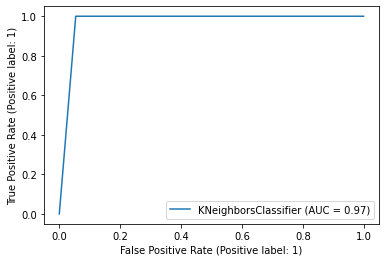

In [ ]:
metrics.plot_roc_curve(knn, X_test, y_test)
plt.show()

# 2- Logistic Regression

In [ ]:
y_pred = lr.predict(X_test)
print(classification_report(y_test, y_pred))
print(f"confusion_matrix:{confusion_matrix(y_test, y_pred)}")
print(f"f1_score={f1_score(y_test, y_pred, average='binary')}")
print(f"roc_auc_score={roc_auc_score(y_test.to_numpy(), y_pred)}")

              precision    recall  f1-score   support

           0       0.97      1.00      0.99        74
           1       1.00      0.83      0.91        12

    accuracy                           0.98        86
   macro avg       0.99      0.92      0.95        86
weighted avg       0.98      0.98      0.98        86

confusion_matrix:[[74  0]
 [ 2 10]]
f1_score=0.9090909090909091
roc_auc_score=0.9166666666666667


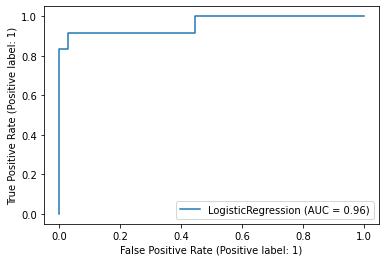

In [ ]:
metrics.plot_roc_curve(lr, X_test, y_test)
plt.show()

# 3- Naïve Bayes

In [ ]:
y_pred = gb.predict(X_test)
print(classification_report(y_test, y_pred))
print(f"confusion_matrix:{confusion_matrix(y_test, y_pred)}")
print(f"f1_score={f1_score(y_test, y_pred, average='binary')}")
print(f"roc_auc_score={roc_auc_score(y_test.to_numpy(), y_pred)}")

              precision    recall  f1-score   support

           0       1.00      0.45      0.62        74
           1       0.23      1.00      0.37        12

    accuracy                           0.52        86
   macro avg       0.61      0.72      0.49        86
weighted avg       0.89      0.52      0.58        86

confusion_matrix:[[33 41]
 [ 0 12]]
f1_score=0.36923076923076925
roc_auc_score=0.722972972972973


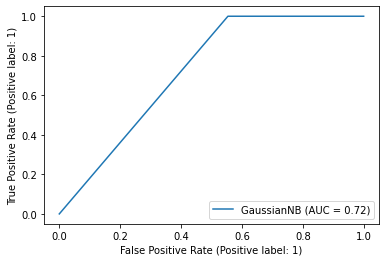

In [ ]:
metrics.plot_roc_curve(gb, X_test, y_test)
plt.show()

# 4- Decision Trees

In [ ]:
y_pred = dtree.predict(X_test)
print(classification_report(y_test, y_pred))
print(f"confusion_matrix:{confusion_matrix(y_test, y_pred)}")
print(f"f1_score={f1_score(y_test, y_pred, average='binary')}")
print(f"roc_auc_score={roc_auc_score(y_test.to_numpy(), y_pred)}")

              precision    recall  f1-score   support

           0       0.95      0.99      0.97        74
           1       0.89      0.67      0.76        12

    accuracy                           0.94        86
   macro avg       0.92      0.83      0.86        86
weighted avg       0.94      0.94      0.94        86

confusion_matrix:[[73  1]
 [ 4  8]]
f1_score=0.761904761904762
roc_auc_score=0.8265765765765765


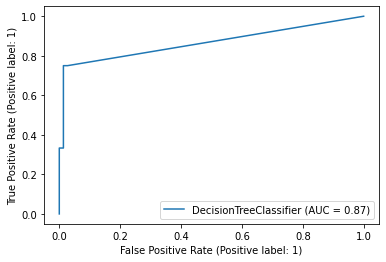

In [ ]:
metrics.plot_roc_curve(dtree, X_test, y_test)
plt.show()

# 5- Support Vector Machines

In [15]:
y_pred = svc.predict(X_test)
print(classification_report(y_test, y_pred))
print(f"confusion_matrix:{confusion_matrix(y_test, y_pred)}")
print(f"f1_score={f1_score(y_test, y_pred, average='binary')}")
print(f"roc_auc_score={roc_auc_score(y_test.to_numpy(), y_pred)}")

              precision    recall  f1-score   support

           0       0.93      1.00      0.96        74
           1       1.00      0.50      0.67        12

    accuracy                           0.93        86
   macro avg       0.96      0.75      0.81        86
weighted avg       0.94      0.93      0.92        86

confusion_matrix:[[74  0]
 [ 6  6]]
f1_score=0.6666666666666666
roc_auc_score=0.75


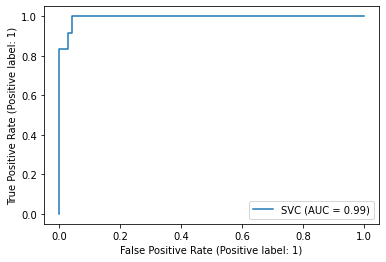

In [ ]:
metrics.plot_roc_curve(svc, X_test, y_test)
plt.show()